# DataPre-Processing & Feature Selection

## Importing Basic Lib

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Data Loading 

In [72]:
df=pd.read_csv("male_players_20.csv")
pd.set_option("display.max_columns",None)


In [25]:
df.replace('[!@#\?]','',regex=True,inplace=True)

In [26]:
columns = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm',
           'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']
df[columns]

for colmun in columns:
    df[colmun] = df[colmun].str.split('+',expand=True)[0]

## Data Preprocessing

In [27]:
pd.set_option('display.max_rows',None)
df.isnull().sum()

sofifa_id                         0
player_url                        0
short_name                        0
long_name                         0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
nationality                       0
club                              0
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
body_type                         0
real_face                         0
release_clause_eur             1298
player_tags                   16779
team_position                   240
team_jersey_number              240
loaned_from                   17230
joined                      

In [28]:
columns_to_impute = ['release_clause_eur','contract_valid_until', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

for column in columns_to_impute:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

In [29]:
for column in columns_to_impute:
    missing_count = df[column].isnull().sum()
    print(f"{column}: {missing_count}")

release_clause_eur: 0
contract_valid_until: 0
pace: 0
shooting: 0
passing: 0
dribbling: 0
defending: 0
physic: 0


In [30]:
df["team_position"].mode()
df.loc[df["team_position"].isnull()==True,"team_position"]="SUB"

In [31]:
df["team_position"].value_counts()

team_position
SUB    8060
RES    2958
GK      662
RCB     660
LCB     660
RB      560
LB      560
ST      458
RCM     411
LCM     411
RM      399
LM      398
CAM     311
RDM     244
LDM     242
RS      195
LS      195
CDM     181
LW      162
RW      161
CB      100
CM       76
RWB      58
LWB      58
RAM      23
LAM      23
RF       19
LF       19
CF       14
Name: count, dtype: int64

In [32]:
df.loc[df["team_position"]=="CF","team_position"]=0
df.loc[df["team_position"]=="LF","team_position"]=1
df.loc[df["team_position"]=="RF","team_position"]=2
df.loc[df["team_position"]=="LAM","team_position"]=3
df.loc[df["team_position"]=="RAM","team_position"]=4
df.loc[df["team_position"]=="LWB","team_position"]=5
df.loc[df["team_position"]=="RWB","team_position"]=6
df.loc[df["team_position"]=="CM","team_position"]=7
df.loc[df["team_position"]=="CB","team_position"]=8
df.loc[df["team_position"]=="RW","team_position"]=9
df.loc[df["team_position"]=="LW","team_position"]=10
df.loc[df["team_position"]=="CDM","team_position"]=11
df.loc[df["team_position"]=="LS","team_position"]=12
df.loc[df["team_position"]=="RS","team_position"]=13
df.loc[df["team_position"]=="LDM","team_position"]=14
df.loc[df["team_position"]=="RDM","team_position"]=15
df.loc[df["team_position"]=="CAM","team_position"]=16
df.loc[df["team_position"]=="LM","team_position"]=17
df.loc[df["team_position"]=="RM","team_position"]=18
df.loc[df["team_position"]=="LCM","team_position"]=19
df.loc[df["team_position"]=="RCM","team_position"]=20
df.loc[df["team_position"]=="ST","team_position"]=21
df.loc[df["team_position"]=="LB","team_position"]=22
df.loc[df["team_position"]=="RB","team_position"]=23
df.loc[df["team_position"]=="LCB","team_position"]=24
df.loc[df["team_position"]=="RCB","team_position"]=25
df.loc[df["team_position"]=="GK","team_position"]=26
df.loc[df["team_position"]=="RES","team_position"]=27
df.loc[df["team_position"]=="SUB","team_position"]=28

### 3. HANDLE OUTLIERS

In [33]:
num_df=df.select_dtypes(include=["int64","float64"])
num_df.columns

Index(['sofifa_id', 'age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
       'skill_moves', 'release_clause_eur', 'team_jersey_number',
       'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positionin

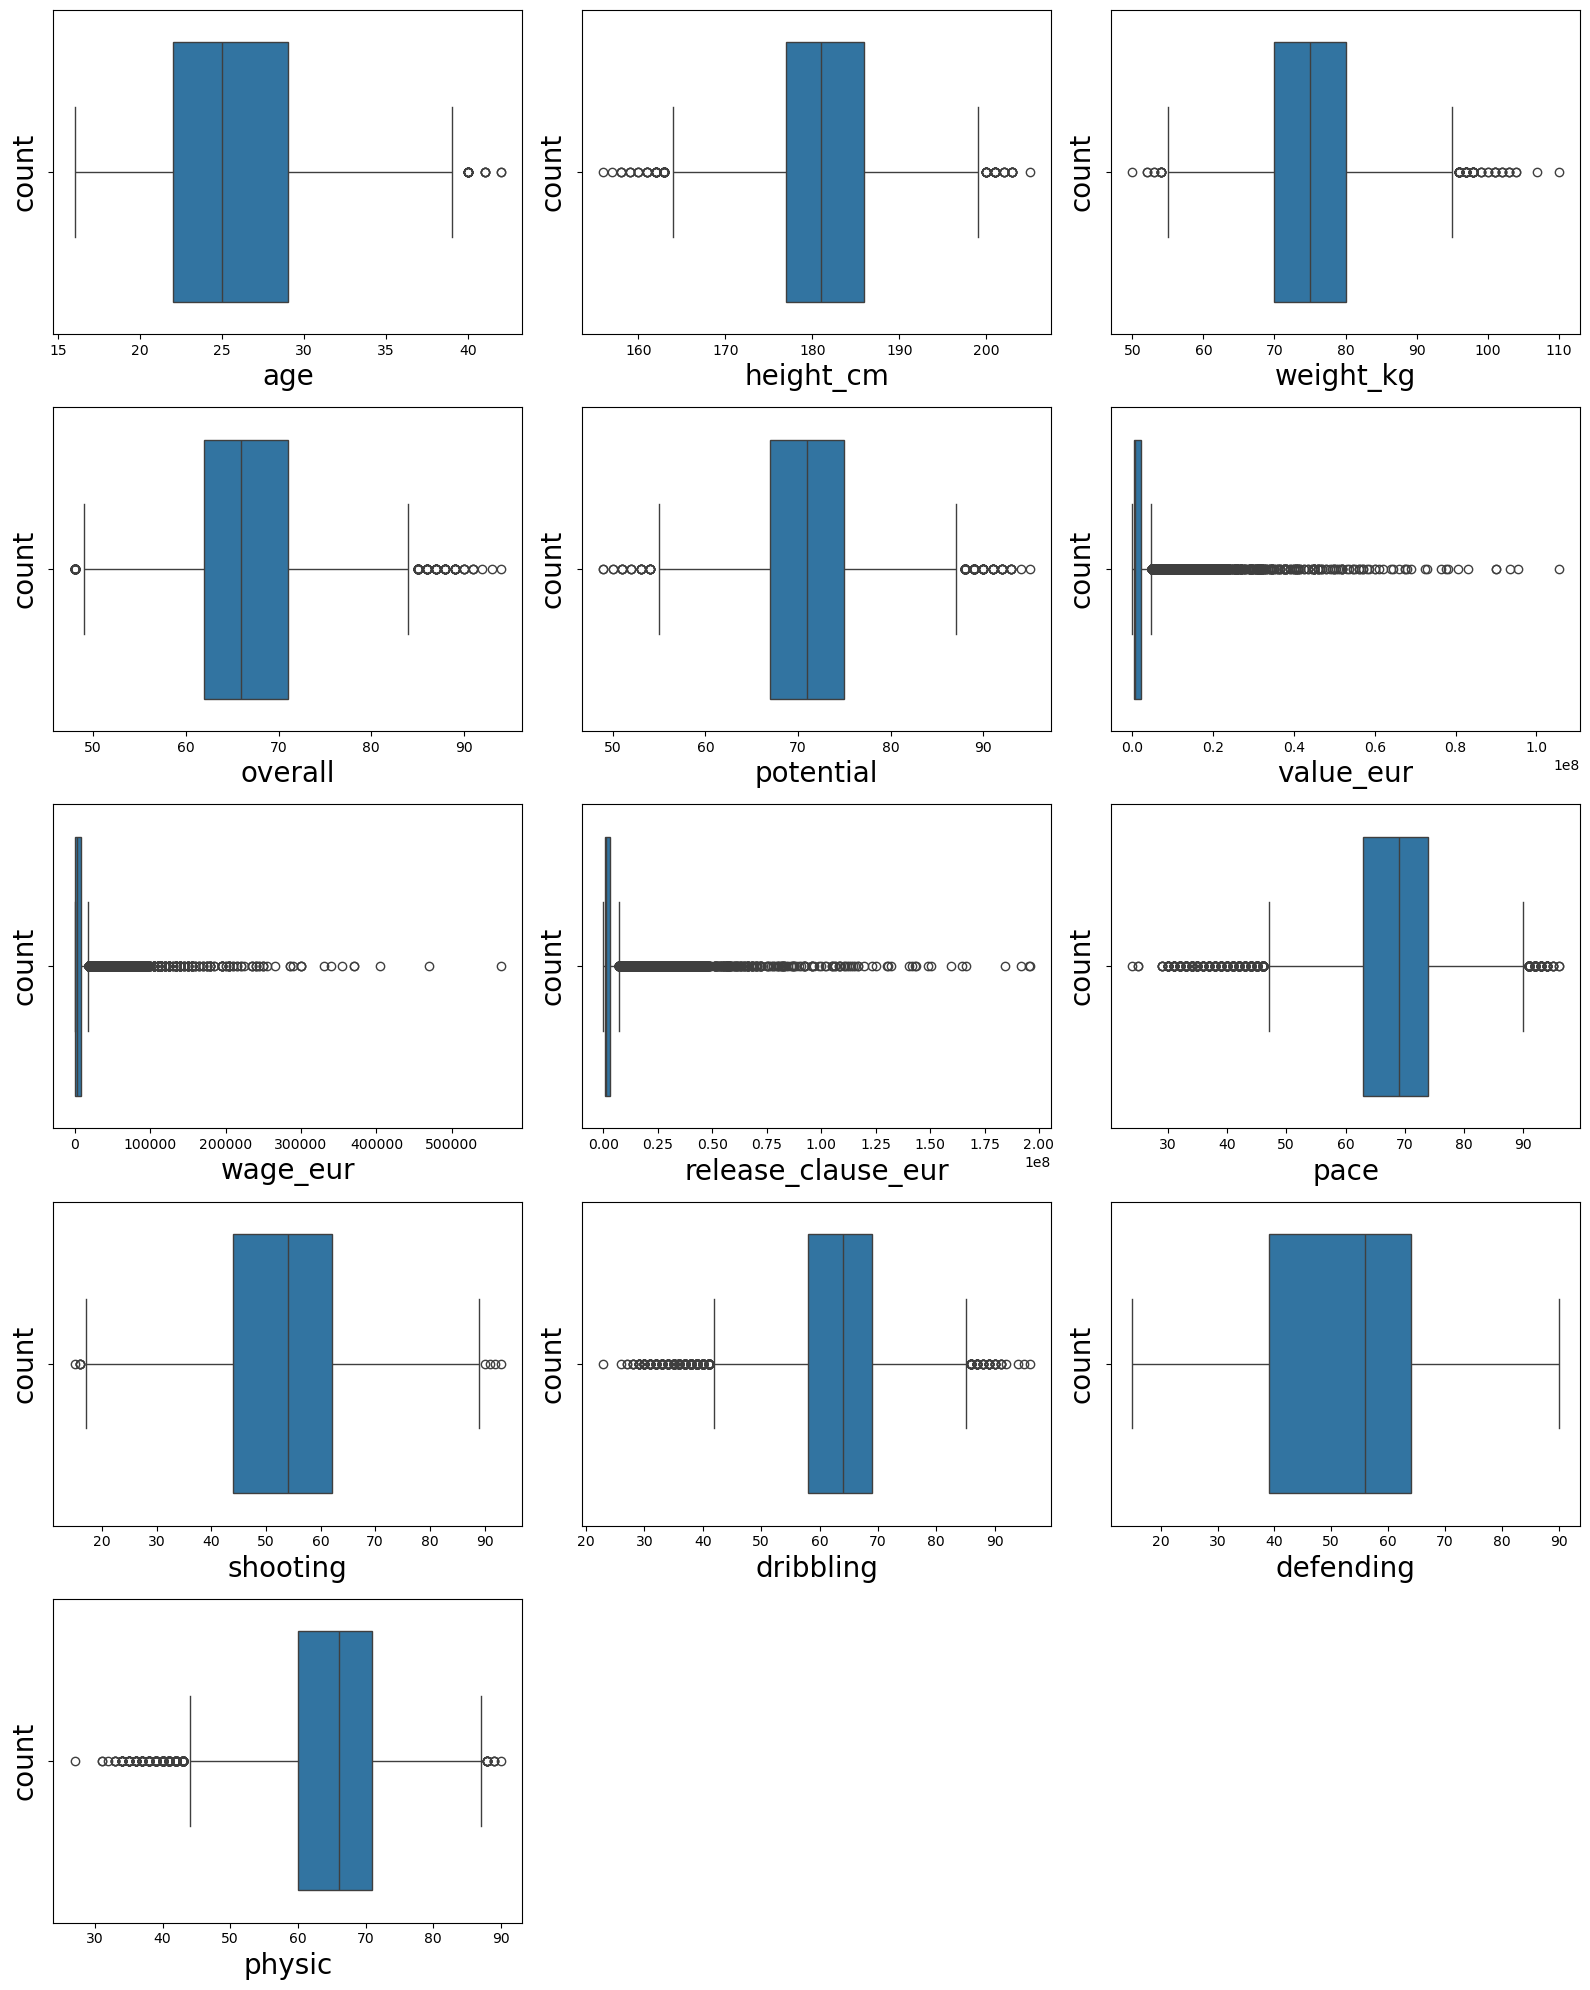

In [34]:
outlier_check = ['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur','release_clause_eur','pace',
           'shooting','dribbling','defending','physic']

plt.figure(figsize=(16,20),facecolor="white")
plotnumber=1

for column in outlier_check:
    if plotnumber<=len(num_df):
        plt.subplot(5,3,plotnumber)
        sns.boxplot(x=df[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel("count",fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [35]:
# Age
Q1=df["age"].quantile(0.25)
Q3=df["age"].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [36]:
df.loc[df["age"]>upper_limit]
len(df.loc[df["age"]>upper_limit])/len(df)
df.loc[df["age"]>upper_limit,"age"]=df["age"].median()

In [37]:
df.loc[df["age"]<lower_limit]

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb


In [38]:
# Height
lower_limit=df["height_cm"].mean()-3*df["height_cm"].std()
upper_limit=df["height_cm"].mean()+3*df["height_cm"].std()

In [39]:
df.loc[df["height_cm"]>upper_limit]
len(df.loc[df["height_cm"]>upper_limit])/len(df)
df.loc[df["height_cm"]>upper_limit,"height_cm"]=df["height_cm"].median()

In [40]:
df.loc[df["height_cm"]<lower_limit]

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
1352,221634,https://sofifa.com/player/221634/luciano-acost...,L. Acosta,Luciano Federico Acosta,25,1994-05-31,161,61,Argentina,DC United,76,80,10000000,9000,"CAM, LM",Right,1,3,5,High/Medium,Normal,Yes,15800000.0,NaN,17,10.0,NaN,2016-11-16,2019.0,NaN,NaN,81.0,67.0,71.0,80.0,46.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,"Selfish, Finesse Shot, Crowd Favourite",61,67,53,77,67,80,74,62,70,77,87,76,88,74,90,71,57,75,51,67,69,44,72,73,54,73,47,47,33,13,9,6,12,10,70,70,70,74,74,74,74,74,75,75,75,74,71,71,71,74,61,61,61,61,61,58,52,52,52,58
1496,183895,https://sofifa.com/player/183895/maxi-moralez/...,M. Moralez,Maximiliano Nicol Moralez,32,1987-02-27,158,56,Argentina,New York City FC,76,76,6000000,9000,"CAM, CM",Right,2,4,4,High/High,Normal,Yes,9000000.0,NaN,19,10.0,NaN,2017-02-15,2022.0,NaN,NaN,73.0,71.0,74.0,77.0,52.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Finesse Shot, Crowd Favourite",74,72,56,74,70,77,76,70,73,76,82,65,81,74,77,69,31,76,33,70,65,45,74,77,74,76,48,58,51,6,5,14,14,9,69,69,69,74,73,73,73,74,74,74,74,74,72,72,72,74,65,62,62,62,65,62,53,53,53,62
1923,170719,https://sofifa.com/player/170719/diego-buonano...,D. Buonanotte,Diego Mario Buonanotte Rende,31,1988-04-19,161,57,Argentina,Universidad Católica,75,75,6000000,13000,CAM,Left,2,4,4,Medium/Low,Lean,No,8400000.0,Acrobat,28,18.0,NaN,2016-07-20,2020.0,NaN,NaN,84.0,67.0,72.0,79.0,30.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,"Selfish, Finesse Shot, Speed Dribbler (CPU AI ...",72,62,36,71,61,77,78,76,70,77,82,85,90,70,94,69,61,60,29,77,30,25,69,72,71,68,35,31,18,15,16,16,9,13,65,65,65,74,72,72,72,74,73,73,73,73,67,67,67,73,54,49,49,49,54,50,37,37,37,50
3159,199940,https://sofifa.com/player/199940/juan-ezequiel...,J. Cuevas,Juan Ezequiel Cuevas,31,1988-06-04,161,63,Argentina,CD Everton de Viña del Mar,73,73,3500000,5000,"RW, LW, LM",Left,1,3,3,High/Medium,Normal,No,4700000.0,NaN,9,10.0,NaN,2017-06-27,2020.0,NaN,NaN,85.0,64.0,71.0,76.0,44.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Crowd Favourite",72,65,59,74,59,74,67,70,62,74,88,82,84,67,91,64,78,71,57,61,63,40,71,72,71,58,34,51,48,15,13,8,13,16,68,68,68,73,71,71,71,73,72,72,72,73,67,67,67,73,62,58,58,58,62,60,53,53,53,60
3898,202184,https://sofifa.com/player/202184/joao-plata/20...,J. Plata,João Jimmy Plata Cotera,27,1992-03-01,157,71,Ecuador,Real Salt Lake,72,72,3300000,7000,"LW, LM",Right,1,2,3,High/Medium,Normal,No,4900000.0,Acrobat,28,10.0,NaN,2013-01-01,2023.0,NaN,NaN,85.0,67.0,69.0,74.0,34.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,"Argues with Officials, Crowd Favourite",65,65,62,69,64,71,70,69,64,70,89,81,94,74,93,74,63,70,58,64,52,29,69,74,69,70,34,29,27,11,15,9,13,13,69,69,69,72,71,71,71,72,71,71,71,71,65,65,65,71,55,52,52,52,55,52,45,45,45,52
3946,214327,https://sofifa.com/player/214327/vladimir-h

In [41]:
# Weight
lower_limit=df["weight_kg"].mean()-3*df["weight_kg"].std()
upper_limit=df["weight_kg"].mean()+3*df["weight_kg"].std()

In [42]:
df.loc[df["weight_kg"]>upper_limit]
len(df.loc[df["weight_kg"]>upper_limit])/len(df)
df.loc[df["weight_kg"]>upper_limit,"weight_kg"]=df["weight_kg"].median()

In [43]:
df.loc[df["weight_kg"]<lower_limit]
len(df.loc[df["weight_kg"]<lower_limit])/len(df)
df.loc[df["weight_kg"]<lower_limit,"weight_kg"]=df["weight_kg"].median()

In [44]:
# Overall
lower_limit=df["overall"].mean()-3*df["overall"].std()
upper_limit=df["overall"].mean()+3*df["overall"].std()

In [45]:
df.loc[df["overall"]>upper_limit]
len(df.loc[df["overall"]>upper_limit])/len(df)
df.loc[df["overall"]>upper_limit,"overall"]=df["overall"].median()

In [46]:
df.loc[df["overall"]<lower_limit]

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb


In [49]:
# Potential
lower_limit=df["potential"].mean()-3*df["potential"].std()
upper_limit=df["potential"].mean()+3*df["potential"].std()

In [50]:
df.loc[df["potential"]>upper_limit]
len(df.loc[df["potential"]>upper_limit])/len(df)
df.loc[df["potential"]>upper_limit,"potential"]=df["potential"].median()

In [51]:
df.loc[df["potential"]<lower_limit]
len(df.loc[df["potential"]<lower_limit])/len(df)
df.loc[df["potential"]<lower_limit,"potential"]=df["potential"].median()

In [52]:
# Value_Eur
Q1=df["value_eur"].quantile(0.25)
Q3=df["value_eur"].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [53]:
df.loc[df["value_eur"]>upper_limit,"value_eur"]=df["value_eur"].median()

In [54]:
# Wage_Eur
Q1=df["wage_eur"].quantile(0.25)
Q3=df["wage_eur"].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [55]:
df.loc[df["wage_eur"]>upper_limit,"wage_eur"]=df["wage_eur"].median()

In [56]:
# Release_Clause_Eur
Q1=df["release_clause_eur"].quantile(0.25)
Q3=df["release_clause_eur"].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [57]:
df.loc[df["release_clause_eur"]>upper_limit,"release_clause_eur"]=df["release_clause_eur"].median()

In [59]:
# Pace
Q1=df["pace"].quantile(0.25)
Q3=df["pace"].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [60]:
df.loc[df["pace"]>upper_limit,"pace"]=df["pace"].median()

In [61]:
df.loc[df["pace"]<lower_limit,"pace"]=df["pace"].median()

In [62]:
# Shooting
Q1=df["shooting"].quantile(0.25)
Q3=df["shooting"].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [63]:
df.loc[df["shooting"]>upper_limit,"shooting"]=df["shooting"].median()

In [64]:
df.loc[df["shooting"]<lower_limit,"shooting"]=df["shooting"].median()

In [66]:
# Dribbling
Q1=df["dribbling"].quantile(0.25)
Q3=df["dribbling"].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [67]:
df.loc[df["dribbling"]>upper_limit,"dribbling"]=df["dribbling"].median()

In [68]:
df.loc[df["dribbling"]<lower_limit,"dribbling"]=df["dribbling"].median()

In [69]:
# Physic
Q1=df["physic"].quantile(0.25)
Q3=df["physic"].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [70]:
df.loc[df["physic"]>upper_limit,"physic"]=df["physic"].median()

In [71]:
df.loc[df["physic"]<lower_limit,"physic"]=df["physic"].median()